# Faça como eu fiz

## Gráfico de árvore
E aí? Conseguiu descobrir uma forma de representar a participação de todos os Estados no PIB nacional numa mesma visualização que tentamos na aula [Problemas em um gráfico de pizza](https://cursos.alura.com.br/course/data-visualization-graficos-composicao-relacionamento/task/137258)? Qual visualização você acha que seria a ideal?

Para responder essas perguntas, vamos reler o 1º questionamento e respondê-lo com um **gráfico de árvore**, mais conhecido como **Treemap**:

*Como está disposto o PIB nos Estados brasileiros no ano de 2020? É possível notar os Estados com maior e menor participação no PIB nacional?*

Antes de gerar a visualização, vamos entender o que é um treemap e quais são as suas utilidades.

### O que é um treemap
O **gráfico de árvore** ou **treemap** é um tipo de visual muito utilizado para mostrar a composição e a hierarquia dos dados usando formas geométricas retangulares coloridas. A imagem abaixo ilustra um exemplo:

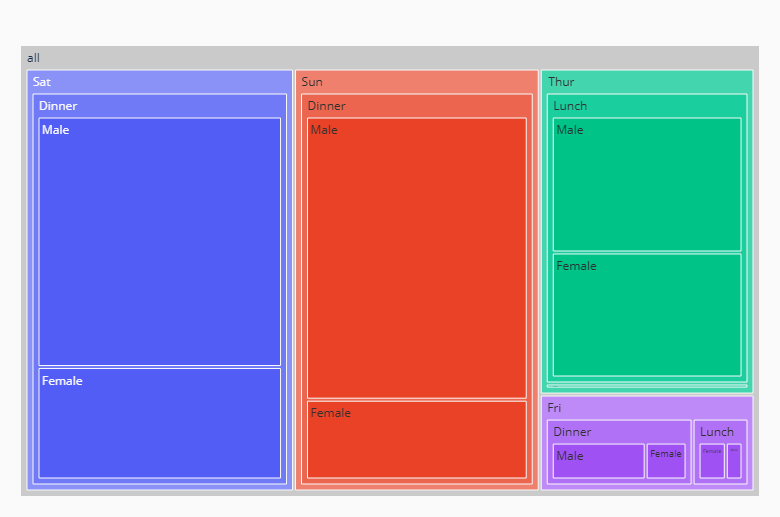

Cada retângulo nesse visual tem o seu tamanho baseado no valor dos dados representados, ou seja, quanto maior o retângulo, mais vezes aquele valor aparece no conjunto de dados. Para o caso da composição do PIB, quanto maior a participação, maior também será o tamanho dos retângulos.

As cores também são utilizadas para informar algo ao nosso público. Ela pode ser utilizada para representar uma **variável categórica** ou **variável numérica**, como regiões do país ou população das regiões, respectivamente.

Este visual pode ser utilizado quando:
- Queremos exibir grandes quantidades de dados hierárquicos.
- Gráficos de setores ou barras não conseguem lidar com um grande volume de valores.
- Desejamos mostrar as proporções entre cada parte e o todo.
- Queremos detalhar os dados com o auxílio do tamanho e cores disponíveis.
- Agora que aprendemos o que é e para que ser um treemap, vamos construir o nosso para representar a composição do PIB de acordo com os Estados.

> Atenção: O processo que será explicado na sequência pode ser realizado dentro do notebook do Colab baixado ao longo do curso. Você encontrará essa parte, na aba **Para saber mais: Gráfico de árvore (Treemap)**, logo após o gráfico de rosca gerado no vídeo anterior.

### Gerando um treemap
Antes de criar o visual, vamos tratar os dados para o formato que queremos apresentar ao nosso público. Primeiro, assegure que os códigos com os dados do projeto e da paleta de cores já foram executados. Em seguida, vamos criar o DataFrame `pib_2020` copiando o `df_pib` e selecionando as colunas `regiao`, `sigla_uf` e `pib`:

In [ ]:
# Criando um df com os dados desejados
pib_2020 = df_pib.copy()
pib_2020 = pib_2020.query("ano == 2020")[["regiao", "sigla_uf", "pib"]]

Agora, vamos ajustar os valores do PIB para a ordem dos bilhões e ordenar as colunas em ordem decrescente em relação a coluna `pib`:

In [ ]:
# Ajustando os valores do PIB para bilhões e ordenando pelo pib
pib_2020["pib"] = (pib_2020["pib"] / 1e9).round(0).astype("int64")
pib_2020 = pib_2020.sort_values("pib", ascending= False)

Para concluir o tratamento do conjunto de dados, vamos criar uma coluna que receberá a porcentagem da participação de cada Estado no PIB de 2020, arredondando o valor para uma casa decimal:

In [ ]:
# Gerando uma coluna para a porcentagem da representação de cada Estado no PIB de 2020
pib_2020["pib_%"] = pib_2020["pib"].div(pib_2020["pib"].sum(), axis=0)
pib_2020["pib_%"] = (pib_2020["pib_%"] * 100).round(1)

pib_2020.head()

A leitura dos 5 primeiros valores deve se assemelhar ao *df* abaixo:

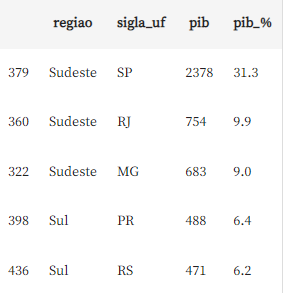

Agora, geramos o gráfico para responder ao questionamento. Vamos importar o módulo `plotly.express` da biblioteca Plotly e utilizar o método `treemap()` junto aos seguintes parâmetros:
- **path**: hierarquia de desenho do treemap
- **values**: medida que determina o tamanho dos retângulos do treemap
- **color**: medida que determina as cores dos retângulos
- **custom_data**: colunas dos dados extras que podem ser utilizados na figura
- **title**: título da figura
- **color_discrete_map**: dicionário definindo as cores das observações do color
O código resultante é o seguinte:

In [ ]:
# Importando a biblioteca
import plotly.express as px

# Gerando o gráfico de árvore (TREEMAP) para o ano de 2020
fig = px.treemap(pib_2020, path=[px.Constant("Distribuição do PIB"), 'sigla_uf'], values='pib_%',
color='regiao', custom_data=['regiao','pib'], 
title='Distribuição do PIB nos estados brasileiros no ano de 2020 (em bilhões de reais)',
color_discrete_map={'(?)': BRANCO,'Sudeste':AZUL3, 'Sul':LARANJA1, 'Nordeste':AZUL5,
'Centro-Oeste':VERDE1, 'Norte':CINZA5})

Por fim, vamos ajustar o layout do gráfico e o texto informativo que podemos ler ao passar o mouse em nosso visual adicionando as linhas abaixo em nosso visual:

In [ ]:
# Ajustando o layout do gráfico
fig.update_layout(width=1400, height=600, margin = dict(t=50, l=0, r=0, b=25), font_family = 'DejaVu Sans',
                  font_size=14, font_color= CINZA2, title_font_color= CINZA1, title_font_size=24)

# Ajustando o hovertext
fig.update_traces(marker=dict(cornerradius=3), texttemplate='<b>%{label}</b>',
hovertemplate='<b>Estado:</b> %{label} <br><b>Região</b> = %{customdata[0]} <br>'                                                                                             '<b>PIB</b> = R$ %{customdata[1]} bi (%{value}%)')
fig.show()

Ao executar o código, conseguimos visualizar o seguinte gráfico de árvore:

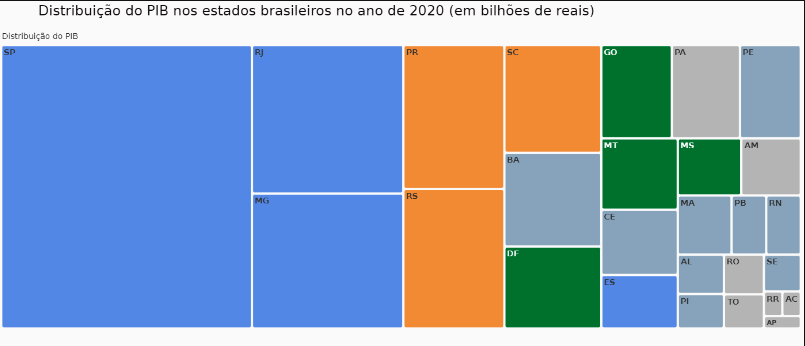

Note que possuímos retângulos de diversos tamanhos apontando a representação de cada Estado no PIB nacional. Este visual responde com sucesso às proporções dos dados, identificando, pelas cores, quais Estados compõem a mesma região.

É importante enfatizar que, como essa visualização carrega diversas formas de destaque de dados (cores, áreas e sub-áreas), precisamos fazer uso dela com bastante cuidado, pois podemos adicionar um excesso de elementos que podem dificultar a análise dos dados de forma rápida e objetiva.